In [1]:
import pandas as pd

In [2]:
df_smoke = pd.read_csv('datasets/smoke_detection_iot.csv')

In [17]:
#o objetivo aqui é prever se devemos acionar o alarme de incendio, dado os atributos

In [4]:
df_smoke.describe()

,Unnamed: 0,UTC,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,Fire Alarm
count,62630.000000,6.263000e+04,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000
mean,31314.500000,1.654792e+09,15.970424,48.539499,1942.057528,670.021044,12942.453936,19754.257912,938.627649,100.594309,184.467770,491.463608,203.586487,80.049042,10511.386157,0.714626
std,18079.868017,1.100025e+05,14.359576,8.865367,7811.589055,1905.885439,272.464305,609.513156,1.331344,922.524245,1976.305615,4265.661251,2214.738556,1083.383189,7597.870997,0.451596
min,0.000000,1.654712e+09,-22.010000,10.740000,0.000000,400.000000,10668.000000,15317.000000,930.852000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,15657.250000,1.654743e+09,10.994250,47.530000,130.000000,400.000000,12830.000000,19435.000000,938.700000,1.280000,1.340000,8.820000,1.384000,0.033000,3625.250000,0.000000
50%,31314.500000,1.654762e+09,20.130000,50.150000,981.000000,400.000000,12924.000000,19501.000000,938.816000,1.810000,1.880000,12.450000,1.943000,0.044000,9336.000000,1.000000
75%,46971.750000,1.654778e+09,25.409500,53.240000,1189.000000,438.000000,13109.000000,20078.000000,939.418000,2.090000,2.180000,14.420000,2.249000,0.051000,17164.750000,1.000000
max,62629.000000,1.655130e+09,59.930000,75.200000,60000.000000,60000.000000,13803.000000,21410.000000,939.861000,14333.690000,45432.260000,61482.030000,51914.680000,30026.438000,24993.000000,1.000000


In [16]:
df_smoke.columns

Index(['Unnamed: 0', 'UTC', 'Temperature[C]', 'Humidity[%]', 'TVOC[ppb]',
       'eCO2[ppm]', 'Raw H2', 'Raw Ethanol', 'Pressure[hPa]', 'PM1.0', 'PM2.5',
       'NC0.5', 'NC1.0', 'NC2.5', 'CNT', 'Fire Alarm'],
      dtype='object')

In [5]:
df_smoke.isnull().sum()

Unnamed: 0        0
UTC               0
Temperature[C]    0
Humidity[%]       0
TVOC[ppb]         0
eCO2[ppm]         0
Raw H2            0
Raw Ethanol       0
Pressure[hPa]     0
PM1.0             0
PM2.5             0
NC0.5             0
NC1.0             0
NC2.5             0
CNT               0
Fire Alarm        0
dtype: int64

In [10]:
df_smoke['Fire Alarm'].value_counts()

1    44757
0    17873
Name: Fire Alarm, dtype: int64

In [11]:
import matplotlib.pyplot as plt

(array([17873.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0., 44757.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

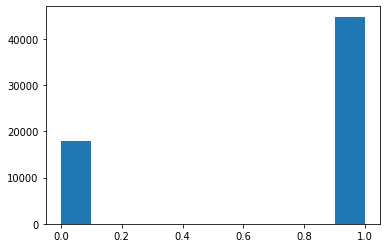

In [12]:
plt.hist(x = df_smoke['Fire Alarm'])

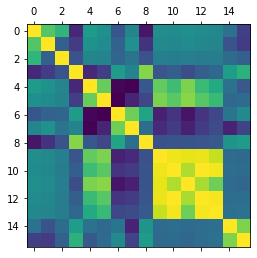

In [14]:
#plt.matshow(df_smoke.corr())
#plt.show()

In [22]:
#separacao atributos e classe

In [24]:
df_smoke.shape

(62630, 16)

In [30]:
X_smoke = df_smoke.iloc[:, 1:15].values

In [29]:
y_smoke = df_smoke.iloc[:, 15].values

In [18]:
#apesar dos dados estarem em formato numerico, ainda nao estao padronizados

In [20]:
from sklearn.preprocessing import StandardScaler

In [31]:
scaler_smoke = StandardScaler()

In [32]:
X_smoke = scaler_smoke.fit_transform(X_smoke)

In [34]:
#agora com dados padronizados separamos a base em treino e teste

In [35]:
from sklearn.model_selection import train_test_split

In [36]:
X_treino, X_teste, y_treino, y_teste = train_test_split(X_smoke, y_smoke, test_size=0.2, random_state=42)

In [37]:
from sklearn.tree import DecisionTreeClassifier

In [42]:
clf = DecisionTreeClassifier(random_state=42).fit(X_treino, y_treino)

In [47]:
y_predito = clf.predict(X_teste)

In [49]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
accuracy_score(y_teste,y_predito)

1.0

In [50]:
#achei meio estranho ter esse score, pois sao mts linhas